### Previous tasks (norms stuff)

(3, 1000)


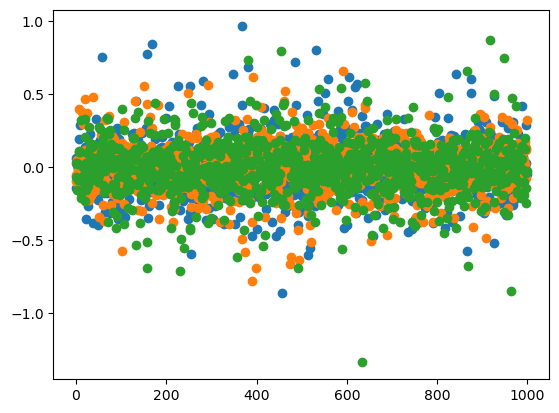

In [21]:
import numpy as np
import matplotlib.pyplot as plt

W_out = np.load("W_out_1-3-3.npy")
print(W_out.shape)
dim_out, num_neurons = W_out.shape
for d in range(dim_out):
    plt.scatter(x=np.arange(stop=num_neurons), y=W_out[d])

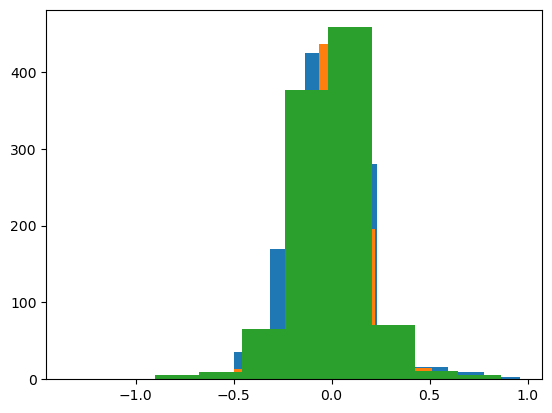

In [22]:
for d in range(dim_out):
    plt.hist(W_out[d])

(2501, 1000)


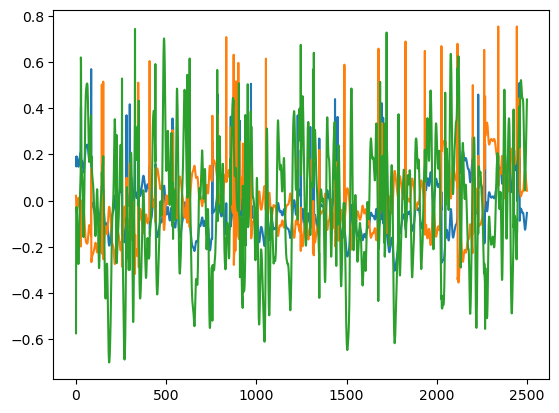

In [23]:
internals = np.load("test_internals_1-3-3.npy")
print(internals.shape)
for n in range(3):
    plt.plot(internals[:, n])

In [24]:
W_out.shape

(3, 1000)

(1000,) 1.4060811429797702 0.019951593557784034
most significant neurons for overall task: [168 867 456 491 917 391 382 157 368 633]
their corresponding weights: [0.87775113 0.88968044 0.8930934  0.90894894 0.91111815 0.91831239
 1.00609212 1.02355728 1.10371322 1.40608114]


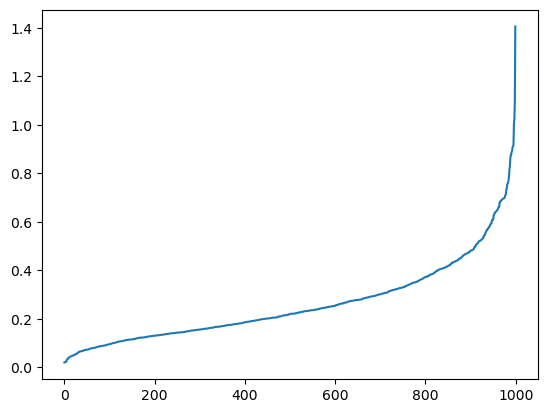

In [25]:
# Find the indices of the neurons with the largest norms, 
# and then compare with neurons with the largest absolute value along each output dimension
norms = np.linalg.norm(W_out, ord=None, axis=0, keepdims=False)
print(norms.shape, max(norms), min(norms)) 
assert len(norms) == 1000 # should compute 1 norm value for all 1000 neurons
if dim_out == 3:
    assert norms[0] == np.sqrt(W_out[0][0]**2 + W_out[1][0]**2 + W_out[2][0]**2)
most_significant_neurons_for_overall_task = np.argsort(norms)[-10:]
print("most significant neurons for overall task:", most_significant_neurons_for_overall_task)
print("their corresponding weights:", norms[most_significant_neurons_for_overall_task])

sorted_norms = norms[np.argsort(norms)]
# plt.scatter(x=np.arange(stop=num_neurons), y=sorted_norms)
plt.plot(sorted_norms)
# start with removing 10 neurons, then 25, 50

In [26]:
# Find the neurons with the largest absolute value along each output dimension
num_significant_neurons = 10
for d in range(dim_out):
    print(f"Output dimension {d} out of {dim_out}")
    W_out_d = W_out[d]
    assert len(W_out_d) == 1000
    print(np.argsort(np.abs(W_out_d))[-num_significant_neurons:])

print(most_significant_neurons_for_overall_task)

Output dimension 0 out of 3
[348 842 382 485  58 157 532 168 456 368]
Output dimension 1 out of 3
[293 102 375 393 476 493 591 474 399 391]
Output dimension 2 out of 3
[869 491 158 230 382 949 454 963 917 633]
[168 867 456 491 917 391 382 157 368 633]


TODO:
* [do now] calculate accuracy of model performance on each output. checked
* [do now] enable neurons to be killed before testing
* [do soon] compare model performance before and after killing significant neurons (to overall task, and to each output dimension task), least significant neurons, and random neurons
* [do soon] vary the number of neurons killed (1, 5, 10, 25, 50, etc)
* [do if we have time] add a noise input channel (combine tasks 1-3-3 with 3-1-1) e.g. 4 or 5 inputs --> 3 outputs
* [do if we have time] perform pca on multi-dimensional W_out matrices to find most/least significant neurons
* [do if we have time] group neurons based on firing patterns using kmean, can also try pca

* killing every single neurons, and keep track of the testing errors. 
* examine different weights on neurons to select neurons to lesion. 
* possibly try 1-1-1 task. 
* [do if we have time] kill neurons before training, correlation btw #killed neurons and performance over test errors.  

### SETUP error_lesions

In [4]:
import numpy as np
# test errors from leision one neurons, leisioned by zeroing out W_in, W_rc, W_fb, NOT W_out
error_lesions = np.load('error_lesions.npy', allow_pickle=True)


In [5]:
single_neuron_significance_metrics = {}
error_0s = []
error_1s = []
error_2s = []
error_wholes = []

for d in error_lesions.item(): 
    #print(error_lesions.item()[d]['error0'])
    error_0s.append(error_lesions.item()[d]['error0'])
    error_1s.append(error_lesions.item()[d]['error1'])
    error_2s.append(error_lesions.item()[d]['error2'])
    error_wholes.append(error_lesions.item()[d]['error_whole'])

single_neuron_significance_metrics['error_0s'] = np.array(error_0s)
single_neuron_significance_metrics['error_1s'] = np.array(error_1s)
single_neuron_significance_metrics['error_2s'] = np.array(error_2s)
single_neuron_significance_metrics['error_wholes'] = np.array(error_wholes)

In [6]:
# sort the neurons by its effect on different tasks
# Note: the effect/significance were evaluated as the TEST ERROR on the model when lesion that single neuron
single_neuron_significance_metrics["output0_sorted_neurons"] = np.argsort(single_neuron_significance_metrics['error_0s'])[::-1]
single_neuron_significance_metrics["output1_sorted_neurons"] = np.argsort(single_neuron_significance_metrics['error_1s'])[::-1]
single_neuron_significance_metrics["output2_sorted_neurons"] = np.argsort(single_neuron_significance_metrics['error_2s'])[::-1]
single_neuron_significance_metrics["output_all_sorted_neurons"] = np.argsort(single_neuron_significance_metrics['error_wholes'])[::-1]

In [7]:
single_neuron_significance_metrics.keys()


dict_keys(['error_0s', 'error_1s', 'error_2s', 'error_wholes', 'output0_sorted_neurons', 'output1_sorted_neurons', 'output2_sorted_neurons', 'output_all_sorted_neurons'])

### Plotting the index of neuron killed vs testing errors

Text(0.5, 1.0, 'output 0 error')

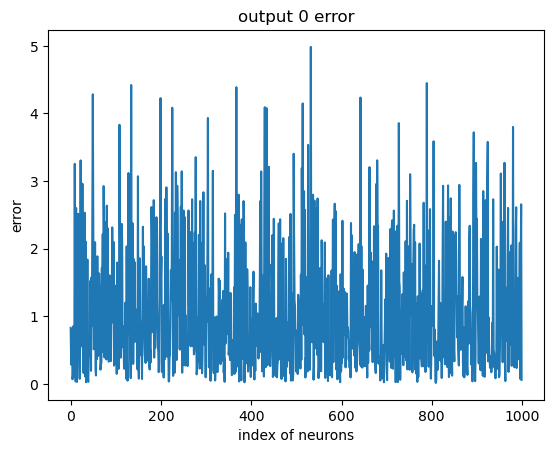

In [31]:
import matplotlib.pyplot as plt
plt.plot(range(1000), single_neuron_significance_metrics['error_0s'])
plt.xlabel('index of neurons')
plt.ylabel('error')
plt.title('output 0 error')

Text(0.5, 1.0, 'output 0 error')

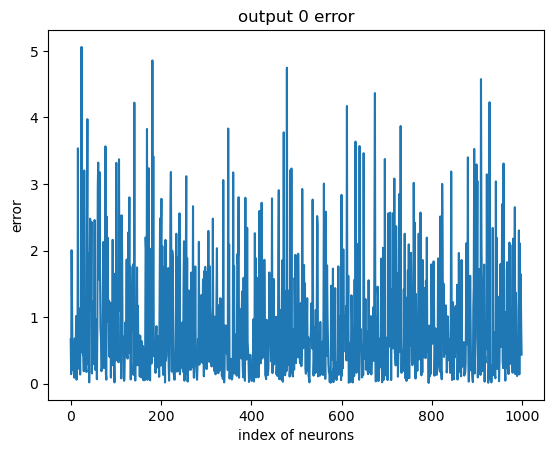

In [32]:
plt.plot(range(1000), single_neuron_significance_metrics['error_1s'])
plt.xlabel('index of neurons')
plt.ylabel('error')
plt.title('output 0 error')

Text(0.5, 1.0, 'output 0 error')

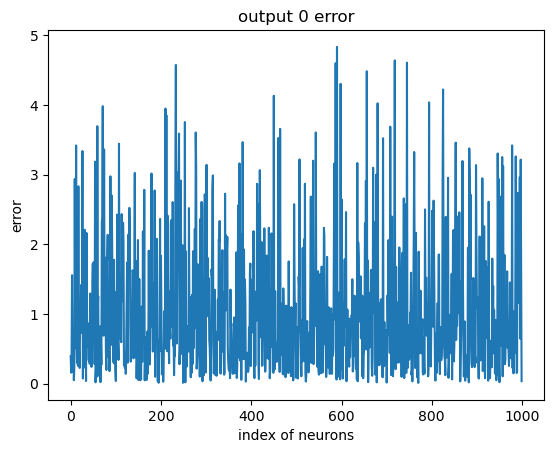

In [33]:
plt.plot(range(1000), single_neuron_significance_metrics['error_2s'])
plt.xlabel('index of neurons')
plt.ylabel('error')
plt.title('output 0 error')

Text(0.5, 1.0, 'output 0 error')

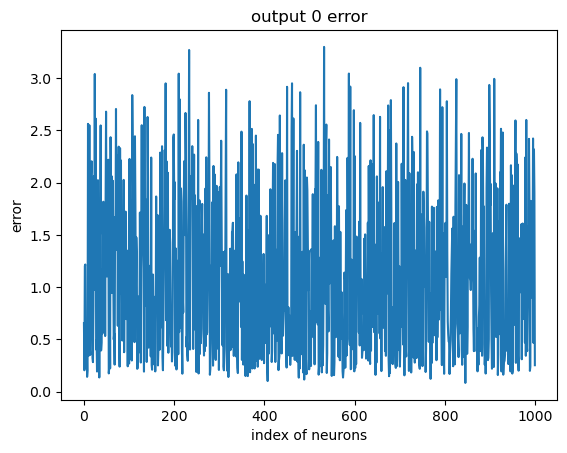

In [34]:
plt.plot(range(1000), single_neuron_significance_metrics['error_wholes'])
plt.xlabel('index of neurons')
plt.ylabel('error')
plt.title('output 0 error')

Text(0.5, 1.0, 'Histogram of test error with single lesion neuron')

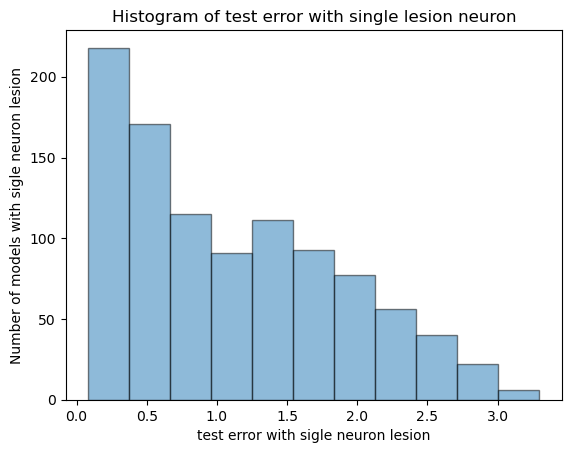

In [105]:
plt.hist(error_wholes, bins=11, edgecolor='black', alpha=0.5)  # bins define the number of intervals in the histogram
plt.xlabel('test error with sigle neuron lesion')
plt.ylabel('Number of models with sigle neuron lesion')
plt.title('Histogram of test error with single lesion neuron')

### Sort the neurons based on W_out, and visualize sorted neurons vs testing error

In [41]:
single_neuron_significance_metrics.keys()

dict_keys(['error_0s', 'error_1s', 'error_2s', 'error_wholes', 'output0_sorted_neurons', 'output1_sorted_neurons', 'output2_sorted_neurons', 'output_all_sorted_neurons'])

In [42]:
import matplotlib.pyplot as plt
import numpy as np

W_out = np.load("W_out.npy")

error_0s = single_neuron_significance_metrics['error_0s']
error_1s = single_neuron_significance_metrics['error_1s']
error_2s = single_neuron_significance_metrics['error_2s']
error_wholes = single_neuron_significance_metrics['error_wholes']

In [43]:
W_out.shape

(3, 1000)

In [44]:
# sort neurons based W_out with all outputs
# using R2 norms, sorted low -> high
norms_all = np.linalg.norm(W_out, ord=None, axis=0, keepdims=False)
sorted_neurons = np.argsort(norms_all)

Text(0.5, 1.0, 'Correlation between $W_{out}$ of trained model\n and test error of model with single neuron lesion')

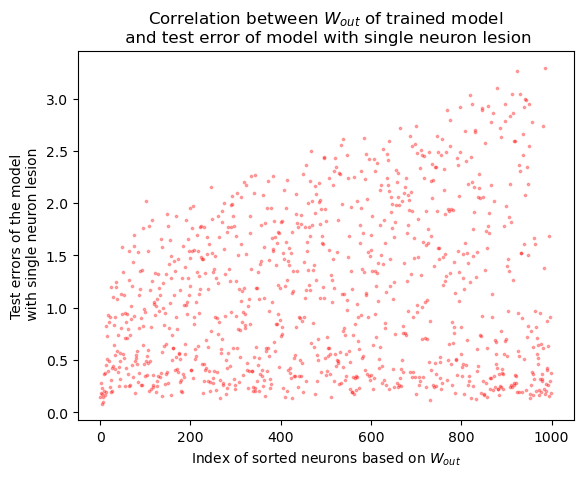

In [73]:
plt.scatter(range(1000), error_wholes[sorted_neurons], c='red', alpha=0.3, marker='o', s=3)
plt.xlabel('Index of sorted neurons based on $W_{out}$')
plt.ylabel('Test errors of the model\n with single neuron lesion')
plt.title('Correlation between $W_{out}$ of trained model\n and test error of model with single neuron lesion')

# It does seem like there’s some correlation btw test error(single neuron lesion) and norms of W_out (with shape(3,1000)).

### Plots of test error with lesioned model (# of leisioned neurons: 0-1000)
**Input File used to select neurons: 'error_lesions.npy'**  
__Selection method: most sig, least sig, random.__  
**Ouput for selection: all three outputs, output0, output1, output2**

#### plots with selection method = most_significant, selection ouput = all

In [50]:
error_alls_most = np.load("error_alls_most_significant_all.npy")
error0s_most = np.load('error0s_most_significant_all.npy')
error1s_most = np.load('error1s_most_significant_all.npy')
error2s_most = np.load('error2s_most_significant_all.npy')

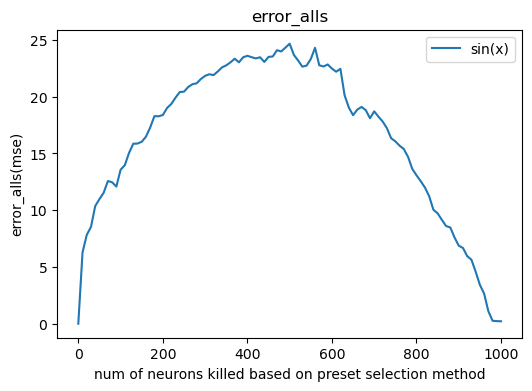

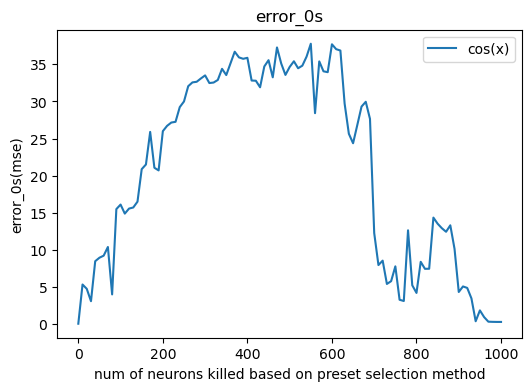

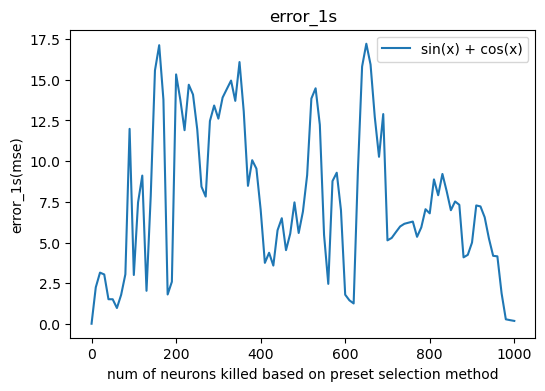

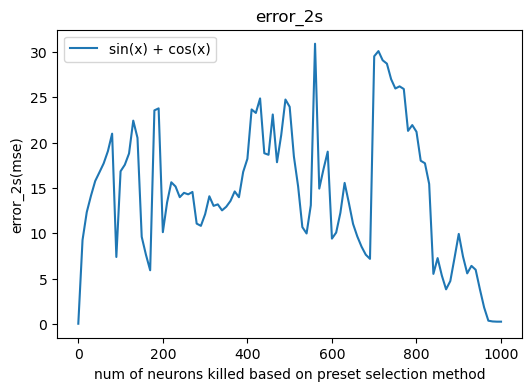

In [43]:
x = np.linspace(0, 1000, 101, dtype = int)
# Plot 1
plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
plt.plot(x, error_alls_most, label='sin(x)')
plt.xlabel('num of neurons killed based on preset selection method')
plt.ylabel('error_alls(mse)')
plt.title('error_alls')
plt.legend()

# Plot 2
plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
plt.plot(x, error0s_most, label='cos(x)')
plt.xlabel('num of neurons killed based on preset selection method')
plt.ylabel('error_0s(mse)')
plt.title('error_0s')
plt.legend()

# Plot 3
plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
plt.plot(x, error1s_most, label='sin(x) + cos(x)')
plt.xlabel('num of neurons killed based on preset selection method')
plt.ylabel('error_1s(mse)')
plt.title('error_1s')
plt.legend()

# Plot 4
plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
plt.plot(x, error2s_most, label='sin(x) + cos(x)')
plt.xlabel('num of neurons killed based on preset selection method')
plt.ylabel('error_2s(mse)')
plt.title('error_2s')
plt.legend()

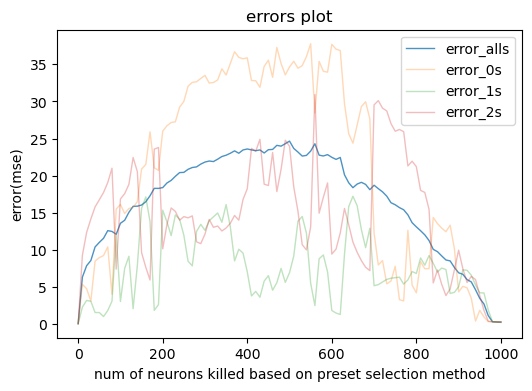

In [44]:
# plot in one figure
x = np.linspace(0, 1000, 101, dtype = int)

plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
plt.plot(x, error_alls_most, linewidth=1, alpha=0.8, label = 'error_alls')
plt.plot(x, error0s_most, linewidth=1, alpha=0.3, label='error_0s')
plt.plot(x, error1s_most, linewidth=1, alpha=0.3, label='error_1s')
plt.plot(x, error2s_most, linewidth=1, alpha=0.3, label='error_2s')
plt.xlabel('num of neurons killed based on preset selection method')
plt.ylabel('error(mse)')
plt.title('errors plot')
plt.legend()

#### plots with selection method = least_significant, selection ouput = all

In [47]:
error_alls_least = np.load("error_alls_least_significant_all.npy")
error0s_least = np.load('error0s_least_significant_all.npy')
error1s_least = np.load('error1s_least_significant_all.npy')
error2s_least = np.load('error2s_least_significant_all.npy')


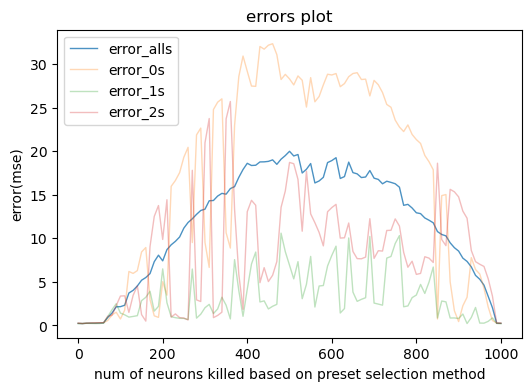

In [48]:
x = np.linspace(0, 1000, 101, dtype = int)

plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
plt.plot(x, error_alls_least, linewidth=1, alpha=0.8, label = 'error_alls')
plt.plot(x, error0s_least, linewidth=1, alpha=0.3, label='error_0s')
plt.plot(x, error1s_least, linewidth=1, alpha=0.3, label='error_1s')
plt.plot(x, error2s_least, linewidth=1, alpha=0.3, label='error_2s')
plt.xlabel('num of neurons killed based on preset selection method')
plt.ylabel('error(mse)')
plt.title('errors plot')
plt.legend()

#### A comparision btw (selection method = most_significant, selection ouput = all), (selection method = most_significant, selection ouput = all), and (selection method = least_significant, selection ouput = all)

In [75]:
error_alls_most = np.load("error_alls_most_significant_all.npy")
error_alls_least = np.load("error_alls_least_significant_all.npy")
error_alls_random = np.load("error_alls_random_all.npy")

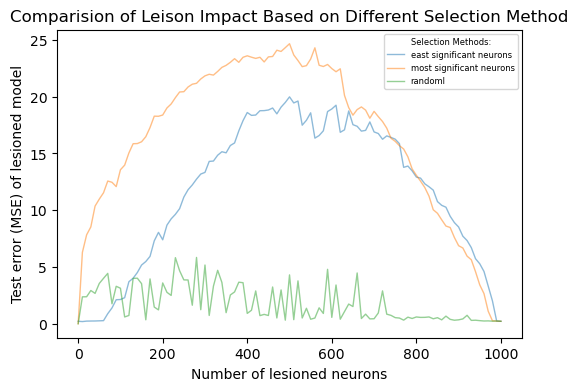

In [86]:
x = np.linspace(0, 1000, 101, dtype = int)

plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
plt.plot(x, error_alls_least, linewidth=1, alpha=0.5, label = 'east significant neurons')
plt.plot(x, error_alls_most, linewidth=1, alpha=0.5, label='most significant neurons')
plt.plot(x, error_alls_random, linewidth=1, alpha=0.5, label='randoml')
plt.xlabel('Number of lesioned neurons')
plt.ylabel('Test error (MSE) of lesioned model')
plt.title('Comparision of Leison Impact Based on Different Selection Method')
plt.legend(title='Selection Methods:', title_fontsize = 6, fontsize=6)

### Look at internals, and try to clustering these time series, make inference on the significance of neurons

In [67]:
train_internals_1_3_3 = np.load('train_internals_1_3_3.npy')
test_internals_1_3_3 = np.load('test_internals_1_3_3.npy')

In [68]:
train_internals_1_3_3.shape, test_internals_1_3_3.shape

((25000, 1000), (2501, 1000))

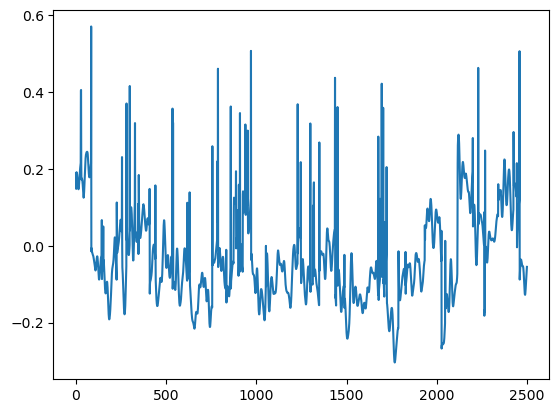

In [72]:
plt.plot(test_internals_1_3_3[:, 0])